In [17]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('kc_house_data.csv')
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890.0,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715.0,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060.0,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050.0,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890.0,0,2003,0,98038,47.3684,-122.031,2390,7570


In [3]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
#lendo as duas colunas e agrupando pela coluna bedrooms
df_group = data[['id', 'bedrooms']].groupby('bedrooms')

In [5]:
# lista o numero de quartos e quantos deles tem
for bedrooms, frame in df_group:
    print('Numero de quartos: {}'.format( bedrooms ))
    print(frame.shape)

Numero de quartos: 0
(13, 2)
Numero de quartos: 1
(199, 2)
Numero de quartos: 2
(2760, 2)
Numero de quartos: 3
(9824, 2)
Numero de quartos: 4
(6882, 2)
Numero de quartos: 5
(1601, 2)
Numero de quartos: 6
(272, 2)
Numero de quartos: 7
(38, 2)
Numero de quartos: 8
(13, 2)
Numero de quartos: 9
(6, 2)
Numero de quartos: 10
(3, 2)
Numero de quartos: 11
(1, 2)
Numero de quartos: 33
(1, 2)


In [6]:
#1. Imoveis por ano de construção
data[['id', 'yr_built']].groupby('yr_built').count()

,id
yr_built,
1900,87
1901,29
1902,27
1903,46
1904,45
...,...
2011,130
2012,170
2013,201


In [7]:
#menor numero de quartos por ano de construção
data[['bedrooms', 'yr_built']].groupby('yr_built').min()

,bedrooms
yr_built,
1900,1
1901,2
1902,2
1903,1
1904,2
...,...
2011,1
2012,2
2013,2


In [8]:
#preço de compra mais caro por numero de quartos
data[['bedrooms', 'price']].groupby('bedrooms').max()

,price
bedrooms,
0,1295650.0
1,1247000.0
2,3278000.0
3,3800000.0
4,4489000.0
5,7062500.0
6,7700000.0
7,3200000.0
8,3300000.0


In [9]:
#somo do preco das casas pelo numero de quartos
data[['bedrooms', 'price']].groupby('bedrooms').sum()

,price
bedrooms,
0,5.323550e+06
1,6.321093e+07
2,1.107789e+09
3,4.580264e+09
4,4.372957e+09
5,1.259346e+09
6,2.245416e+08
7,3.614502e+07
8,1.436600e+07


In [10]:
#qual a soma do preco das casas pelo numero de quartos e banheiros
#passar os dois parametros que quer filtrar em uma lista
data[['price', 'bedrooms', 'bathrooms']].groupby(['bedrooms', 'bathrooms']).sum()

price
bedrooms bathrooms           
0        0.00       3642600.0
         0.75        265000.0
         1.00        228000.0
         1.50        288000.0
         2.50        899950.0
...                       ...
10       2.00        650000.0
         3.00        660000.0
         5.25       1148000.0
11       3.00        520000.0
33       1.75        640000.0

[144 rows x 1 columns]

In [11]:
#tamanho medio das salas por ano de construcao
data[['sqft_living', 'yr_built']].groupby('yr_built').mean()

,sqft_living
yr_built,
1900,1732.011494
1901,1763.620690
1902,1919.629630
1903,1507.739130
1904,1603.177778
...,...
2011,2313.684615
2012,2378.741176
2013,2636.592040


In [13]:
#qual o tamanho mediano das salas dos imoveis por ano de construcao
data[['sqft_living', 'yr_built']].groupby('yr_built').median()

,sqft_living
yr_built,
1900,1540.0
1901,1610.0
1902,1600.0
1903,1505.0
1904,1280.0
...,...
2011,2270.0
2012,2237.5
2013,2580.0


In [14]:
#qual o desvio padrao do tamanho das salas por ano de construcao
data[['sqft_living', 'yr_built']].groupby('yr_built').std()

,sqft_living
yr_built,
1900,732.944373
1901,668.231804
1902,878.659300
1903,469.723438
1904,1076.870620
...,...
2011,804.863521
2012,771.430350
2013,883.499390


In [15]:
#como é o crescimento medio de preços de compras dos imoveis, por ano, por dia e 
#pela semana do ano?
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
#crescimento medio de precos de compras dos imoveis por ano
#eixo x: anos
#eixo y; soma dos preços
#grafico de barras
data['year'] = pd.to_datetime( data['date'] ).dt.year #transformando de object para datetime e passando para apenas year

In [21]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


In [26]:
by_year = data[['price', 'year']].groupby('year').sum().reset_index() #o year ficava como um index

<BarContainer object of 2 artists>

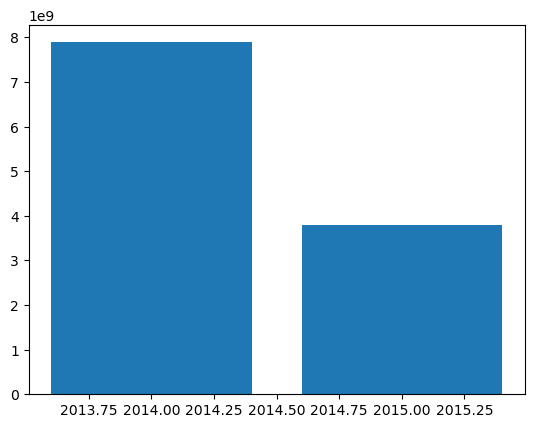

In [27]:
#eixo x: anos
#eixo y; soma dos preços
#vamos usar a matplotlib
from matplotlib import pyplot as plt
plt.bar(by_year['year'], by_year['price']) #x horizontal y vertical

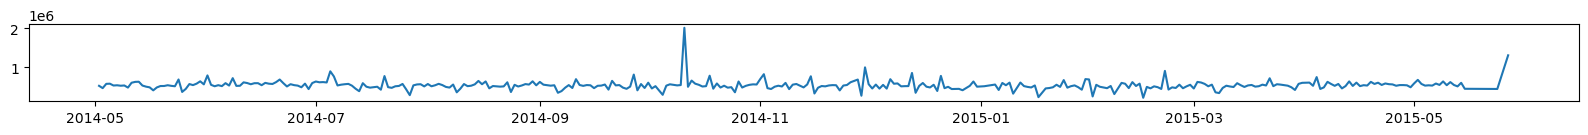

In [31]:
#plotar por dia
data['day'] = pd.to_datetime( data['date'] )
by_day = data[['price', 'day']].groupby('day').mean().reset_index()
plt.figure(figsize=(20, 1)) #para mudar o tamanho da figura que é apresentado
plt.plot(by_day['day'], by_day['price']) #x horizontal y vertical

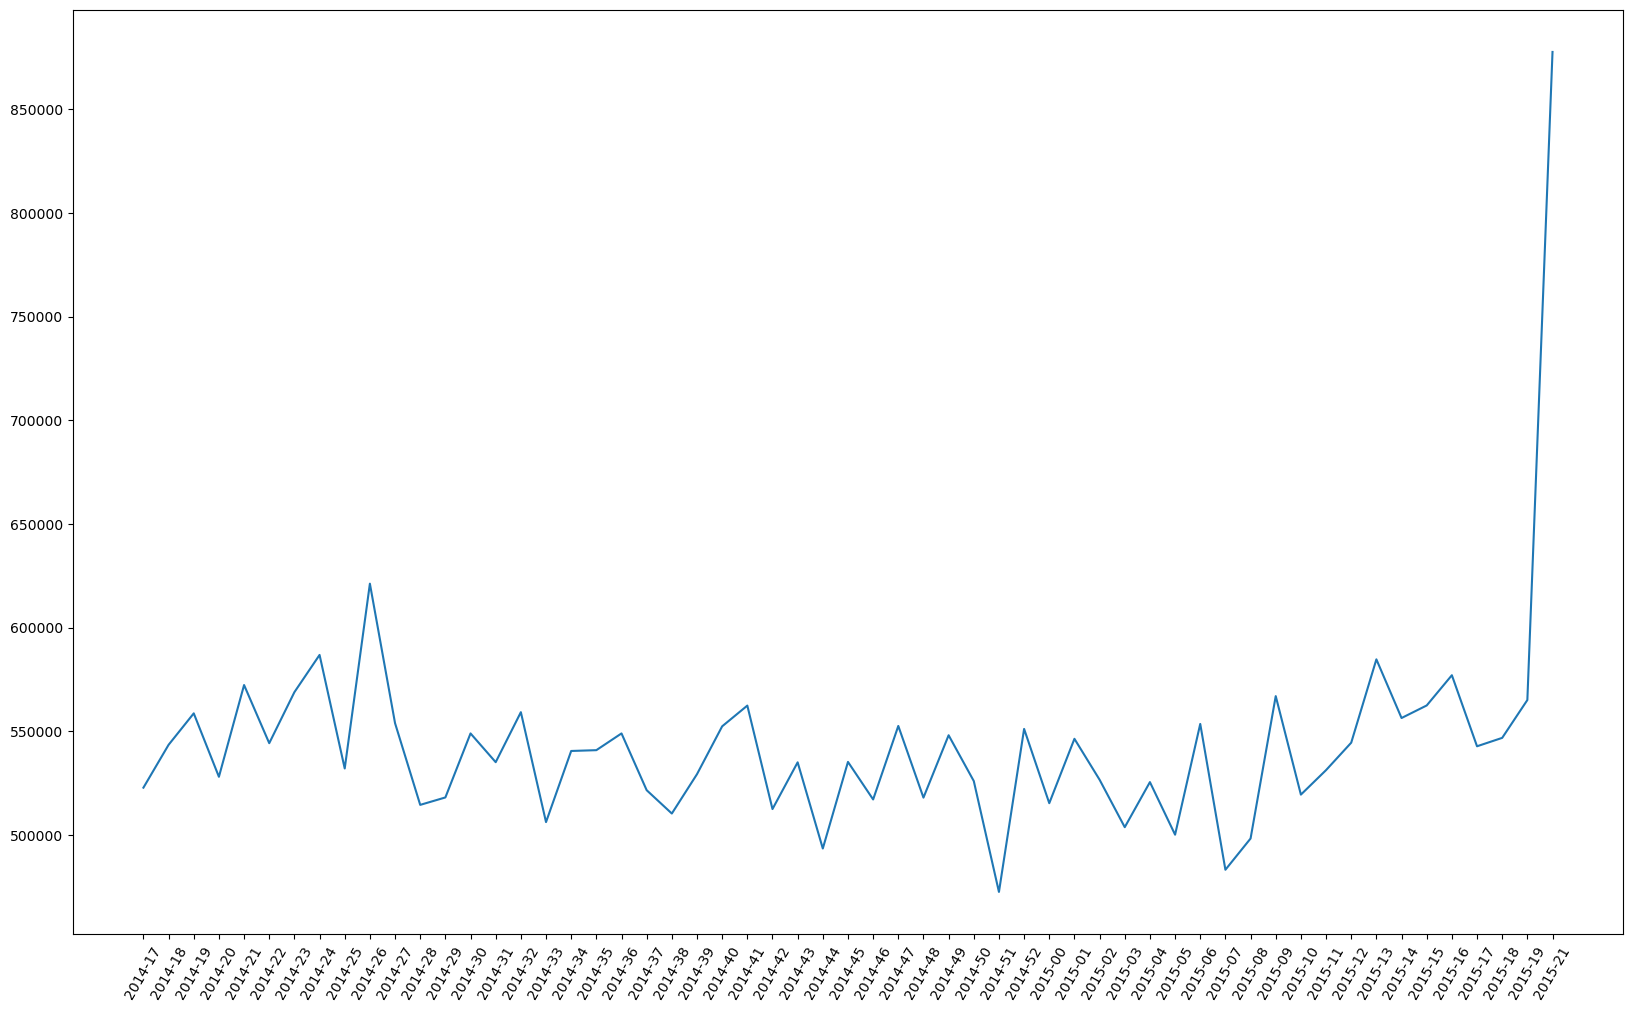

In [36]:
#plotar por dia
data['year_week'] = pd.to_datetime( data['date'] ).dt.strftime('%Y-%U')
by_year_week = data[['price', 'year_week']].groupby('year_week').mean().reset_index()
plt.figure(figsize=(20, 12)) #para mudar o tamanho da figura que é apresentado
plt.plot(by_year_week['year_week'], by_year_week['price']) #x horizontal y vertical
plt.xticks(rotation=60); #para rotacionar os elementos do eixo x  que ficam juntos dms